# Consumo de APIs desde Python

Tenemos diversas librerías que podemos utilizar para generar peticiones a una API. La más popular de todas es requests, que se instala junto a Python. Otra conocida es urllib3.  

Arranquemos analizando qué nos devuelve un pedido a una url.

In [ ]:
#Get a una URL
import requests
url="https://www.google.com.ar"
# genera un objeto de la clase Response. 200 es el código que indica que el procedimiento fue realizado correctamente
resp=requests.get(url)
print(resp)


- 1XX: información
- 2XX: éxito
- 3XX: redireccionamiento
- 4XX: error del cliente (usted cometió un error)
- 5XX: error del servidor (se cometió un error en este)

In [ ]:
#Para ver código de status
import requests
url="https://www.google.com.ar"
# genera un objeto de la clase Response. 200 es el código que indica que el procedimiento fue realizado correctamente
resp=requests.get(url)
print(resp.status_code)

In [ ]:
# En la propiedad content del objeto que me devuelve requests.get (Objeto de la clase Response) tenemos lo que retorna el método get
import requests
url="https://www.google.com.ar"
resp=requests.get(url)
print(type(resp))
if resp.status_code==200:
    print("Todo anduvo perfecto!")
    #Content presenta el contenido de la respuesta, como si hiciéramos la inspección de la página
    print(resp.content)

In [ ]:
# Qué ocurre si escribo un archivo con lo devuelto?
import requests
url="https://www.google.com.ar"
resp=requests.get(url)
if resp.status_code==200:
    #Por qué lo tengo que escribir como byte?
    # print(type(resp.content))
    with open("test.html", mode="wb") as file:
        file.write(resp.content)

Arranquemos con REST. Para testear, usaremos httpbin.org 

In [ ]:
# Cómo decodificamos a texto un array de bytes
import requests
url="http://httpbin.org/get"
resp=requests.get(url)
if resp.status_code==200:
    print(resp.content)
    #Es un array de bytes
    #print(resp.content.decode("utf-8"))
    # Si sabemos que lo que devuelve es un texto, directamente podemos pedir
    print(resp.text)

In [ ]:
#Uso de argumentos en el get
import requests
url="http://httpbin.org/get?id=724&month=5"
resp=requests.get(url)
if resp.status_code==200:
    print(resp.content.decode("utf-8"))
    

In [ ]:
#Conversión a json (diccionario)
import requests
url="http://httpbin.org/get?id=724&month=5"
resp=requests.get(url)
if resp.status_code==200:
    dict=resp.json()
    # print("Todo el diccionario: {}".format(dict))
    # print("----")
    # print("Args: {}".format(dict["args"]))
    print("Mes: {}".format(dict["args"]["month"]))

In [ ]:
#Una forma más cool (y dinámica) de pasar parámetros
import requests
#Otra forma de cargar del json
import json
url="http://httpbin.org/get"
argum={"id":724, "month":5}
resp=requests.get(url, params=argum)
#Armó la URL como antes
# print(resp.url)

if resp.status_code==200:
    print("---")
    #Otra forma de convertir a json
    #Utilizo la librería de json para convertir el array de bytes
    resu=json.loads(resp.text)
    print(resu["args"])
    

## Diferencias entre get y post

La diferencia entre get y post no es sólo cómo se realiza el pasaje de parámetros. 
Ambos envían la petición al servidor mediante un *request* y reciben el resultado de la petición mediante un *response*.  
PERO, el método get está pensado para obtener información del servidor, y los datos que envío sirven para parametrizar esa solicitud. Por lo tanto, el eje está puesto en la devolución de un resultado. En el caso del post, la intención es enviar datos para que el servidor actualice o almacene. Ojo, uno podría hacer lo que hace con el get, mediante un post, y viceversa, pero no tiene sentido, por que además, nos encontramos con las siguientes diferencias:  

<center><img src="images/difgetypost.png" alt="" title="Diferencias entre get y post" /></center><br>
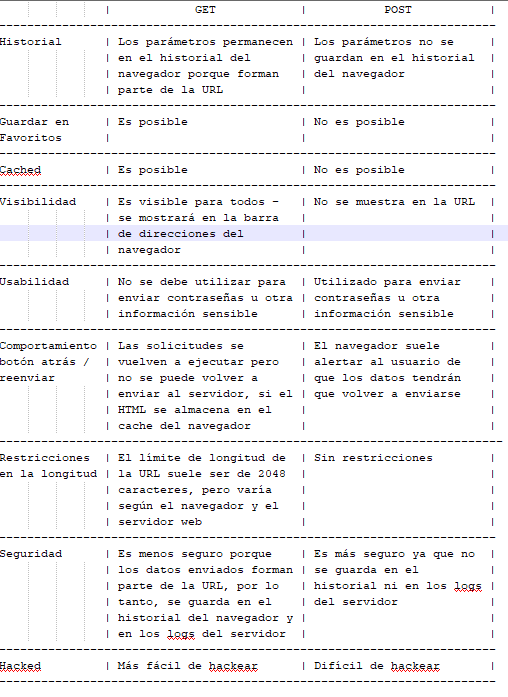

In [ ]:
#Hagamos un post ahora

import requests
import json
url="http://httpbin.org/post"
# Armamos un diccionario con los datos que queremos enviar
payload={"producto":"papa", "precio":55}
# Voy a realizar mi petición y los datos, ya serializados, van a estar dentro del atributo data. 
# Y en el json podemos verlos más legibles
resp=requests.post(url, json=payload)

if resp.status_code==200:
    resu=json.loads(resp.text)
    # print(resu)
    #Imprimiendo json bonito
    print(json.dumps(resu, indent=4))

In [ ]:
#· Encabezados

Cliente y servidor envían encabezados. Ciertos datos se envían habitualmente en encabezados, por ejemplo OAuth.

In [22]:
# Para obtener los encabezados del response solicitamos el atributo headers

import requests
import json
url="http://httpbin.org/post"
payload={"producto":"papa", "precio":55}
# En el encabezado indico que envío datos de tipo json y el access token
encabezados={ 'Content-Type':'application/json', 'Access-Token':'yweersj67'}
# Paso como parámetro headers el diccionario con los encabezados
resp=requests.post(url, json=payload, headers=encabezados)

if resp.status_code==200:
    resu=json.loads(resp.text)
    #Imprimiendo json bonito
    #Para ver los encabezados que me envía el servidor
    print(resp.headers)
    print(resp.headers['Date'])
    print(json.dumps(resu, indent=4))


{'Date': 'Tue, 09 Mar 2021 22:32:48 GMT', 'Content-Type': 'application/json', 'Content-Length': '558', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}
Tue, 09 Mar 2021 22:32:48 GMT
{
    "args": {},
    "data": "{\"producto\": \"papa\", \"precio\": 55}",
    "files": {},
    "form": {},
    "headers": {
        "Accept": "*/*",
        "Accept-Encoding": "gzip, deflate",
        "Access-Token": "yweersj67",
        "Content-Length": "34",
        "Content-Type": "application/json",
        "Host": "httpbin.org",
        "User-Agent": "python-requests/2.24.0",
        "X-Amzn-Trace-Id": "Root=1-6047f790-6feddf6f2f7a9e012c0a1ffd"
    },
    "json": {
        "precio": 55,
        "producto": "papa"
    },
    "origin": "201.235.80.205",
    "url": "http://httpbin.org/post"
}


## PUT y DELETE

Nada nuevo bajo el sol, los construyo de la misma manera que hago un POST, solo que en el servidor, cuando los reciba, realizaré una acción asociada. Habitualmente usamos PUT cuando queremos actualizar o crear un recurso, y DELETE cuando lo queremos borrar.

In [20]:
import requests

url="http://httpbin.org/put"
payload={"producto":"papa", "precio":55}
resp=requests.put(url, json=payload)

if resp.status_code==200:
    resu=json.loads(resp.text)
    print(json.dumps(resu, indent=4))


{
    "args": {},
    "data": "{\"producto\": \"papa\", \"precio\": 55}",
    "files": {},
    "form": {},
    "headers": {
        "Accept": "*/*",
        "Accept-Encoding": "gzip, deflate",
        "Content-Length": "34",
        "Content-Type": "application/json",
        "Host": "httpbin.org",
        "User-Agent": "python-requests/2.24.0",
        "X-Amzn-Trace-Id": "Root=1-6047f759-1fcd2dcb463f9ad235269d07"
    },
    "json": {
        "precio": 55,
        "producto": "papa"
    },
    "origin": "201.235.80.205",
    "url": "http://httpbin.org/put"
}


In [21]:
import requests

url="http://httpbin.org/delete"
payload={"producto":"papa", "precio":55}
resp=requests.delete(url, json=payload)

if resp.status_code==200:
    resu=json.loads(resp.text)
    print(json.dumps(resu, indent=4))

{
    "args": {},
    "data": "{\"producto\": \"papa\", \"precio\": 55}",
    "files": {},
    "form": {},
    "headers": {
        "Accept": "*/*",
        "Accept-Encoding": "gzip, deflate",
        "Content-Length": "34",
        "Content-Type": "application/json",
        "Host": "httpbin.org",
        "User-Agent": "python-requests/2.24.0",
        "X-Amzn-Trace-Id": "Root=1-6047f775-4c14ebe5245de207561529e3"
    },
    "json": {
        "precio": 55,
        "producto": "papa"
    },
    "origin": "201.235.80.205",
    "url": "http://httpbin.org/delete"
}
